# Ukraine-Russia War 2022

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Importing Equipment Data

In [2]:
df = pd.read_csv('russia_losses_equipment.csv',parse_dates=['date'])
df.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,vehicles and fuel tanks,cruise missiles
0,2022-02-25,2,10,7,80,516,49,4,100.0,60.0,0,2,0,NaN,NaN,NaN,NaN
1,2022-02-26,3,27,26,146,706,49,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN
2,2022-02-27,4,27,26,150,706,50,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN
3,2022-02-28,5,29,29,150,816,74,21,291.0,60.0,3,2,5,NaN,NaN,NaN,NaN
4,2022-03-01,6,29,29,198,846,77,24,305.0,60.0,3,2,7,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     74 non-null     datetime64[ns]
 1   day                      74 non-null     int64         
 2   aircraft                 74 non-null     int64         
 3   helicopter               74 non-null     int64         
 4   tank                     74 non-null     int64         
 5   APC                      74 non-null     int64         
 6   field artillery          74 non-null     int64         
 7   MRL                      74 non-null     int64         
 8   military auto            65 non-null     float64       
 9   fuel tank                65 non-null     float64       
 10  drone                    74 non-null     int64         
 11  naval ship               74 non-null     int64         
 12  anti-aircraft warfare    74 non-null  

In [4]:
# Numerous cells have days without losses recorded as NaN
df.fillna(0,inplace=True)
df.isnull().sum()

date                       0
day                        0
aircraft                   0
helicopter                 0
tank                       0
APC                        0
field artillery            0
MRL                        0
military auto              0
fuel tank                  0
drone                      0
naval ship                 0
anti-aircraft warfare      0
special equipment          0
mobile SRBM system         0
vehicles and fuel tanks    0
cruise missiles            0
dtype: int64

Importing Personnel Data

In [5]:
df2 = pd.read_csv('russia_losses_personnel.csv',parse_dates=['date'])

df2.head()

,date,day,personnel,personnel*,POW
0,2022-02-25,2,2800,about,0
1,2022-02-26,3,4300,about,0
2,2022-02-27,4,4500,about,0
3,2022-02-28,5,5300,about,0
4,2022-03-01,6,5710,about,200


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        74 non-null     datetime64[ns]
 1   day         74 non-null     int64         
 2   personnel   74 non-null     int64         
 3   personnel*  74 non-null     object        
 4   POW         74 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 3.0+ KB


In [7]:
df3 = df.set_index("date").join(df2.set_index("date"), rsuffix="_p").drop("day_p", axis=1)

In [28]:
df3.head()

,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,vehicles and fuel tanks,cruise missiles,personnel,personnel*,POW
date,,,,,,,,,,,,,,,,,,,
2022-02-25,2,10,7,80,516,49,4,100.0,60.0,0,2,0,0.0,0.0,0.0,0.0,2800,about,0
2022-02-26,3,27,26,146,706,49,4,130.0,60.0,2,2,0,0.0,0.0,0.0,0.0,4300,about,0
2022-02-27,4,27,26,150,706,50,4,130.0,60.0,2,2,0,0.0,0.0,0.0,0.0,4500,about,0
2022-02-28,5,29,29,150,816,74,21,291.0,60.0,3,2,5,0.0,0.0,0.0,0.0,5300,about,0
2022-03-01,6,29,29,198,846,77,24,305.0,60.0,3,2,7,0.0,0.0,0.0,0.0,5710,about,200


## Analysis


### Correlation Heatmap

In war, your side has good days and bad days. Or to put even simpler: Either you're winning or you're not. Why is this relevant? Because when examining correlations between losses in our data, a predictable trend emerges: 

"We blew up more things from group A so we probably blew up more stuff in group B too."
OR
"We got rolled out there today, AA teams splashed a grand total of one helicopter today so we weren't able to get much else done either."

This sentiment is reflected in this correlation heatmap where the majority of attributes have positive correlations with each other. In terms of "good days and bad days" this correlation makes sense. However there are a few attributes with negative correlations that stand in stark contrast.

Most notably "military auto" and "fuel tank" attributes scale with a heavy negative correlation to all other attributes. The question is why?


<AxesSubplot:>

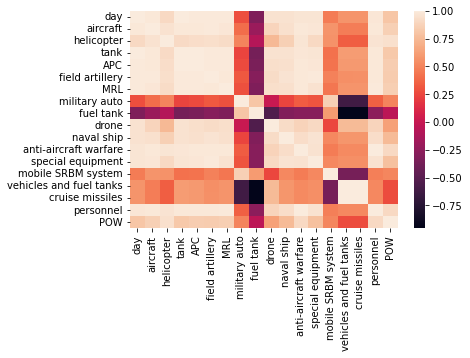

In [29]:
sns.heatmap(df3.corr())

<AxesSubplot:xlabel='date', ylabel='military auto'>

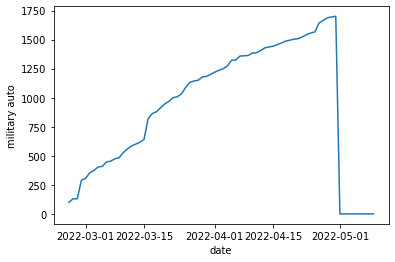

In [30]:
sns.lineplot(data=df3["military auto"])

In [41]:
dtypes = {x: "int" for x in df.columns}
del dtypes.date

print(dtypes)

df5 = df.diff().fillna(df).fillna(0).astype(dtypes)
# df5.head()

AttributeError: 'dict' object has no attribute 'date'

In [50]:
df0 = pd.read_csv("russia_losses_equipment.csv", parse_dates=['date'])

# note that the data from the .csv is cumulative so we must extract the per-day difference
df0.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,vehicles and fuel tanks,cruise missiles
0,2022-02-25,2,10,7,80,516,49,4,100.0,60.0,0,2,0,NaN,NaN,NaN,NaN
1,2022-02-26,3,27,26,146,706,49,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN
2,2022-02-27,4,27,26,150,706,50,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN
3,2022-02-28,5,29,29,150,816,74,21,291.0,60.0,3,2,5,NaN,NaN,NaN,NaN
4,2022-03-01,6,29,29,198,846,77,24,305.0,60.0,3,2,7,NaN,NaN,NaN,NaN


In [49]:
# drop the date/day columns while we preform some integer math
df = df0.drop(["date", "day"], axis=1).diff().fillna(df0).fillna(0).astype(int)

# rejoin the date/day columns
df= df0[["date", "day"]].join(df)
df.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,vehicles and fuel tanks,cruise missiles
0,2022-02-25,2,10,7,80,516,49,4,100,60,0,2,0,0,0,0,0
1,2022-02-26,3,17,19,66,190,0,0,30,0,2,0,0,0,0,0,0
2,2022-02-27,4,0,0,4,0,1,0,0,0,0,0,0,0,0,0,0
3,2022-02-28,5,2,3,0,110,24,17,161,0,1,0,5,0,0,0,0
4,2022-03-01,6,0,0,48,30,3,3,14,0,0,0,2,0,0,0,0
